WhatsApp Image 2025-10-21 at 20.35.24(3).jpeg: raio ≈ 2519 px


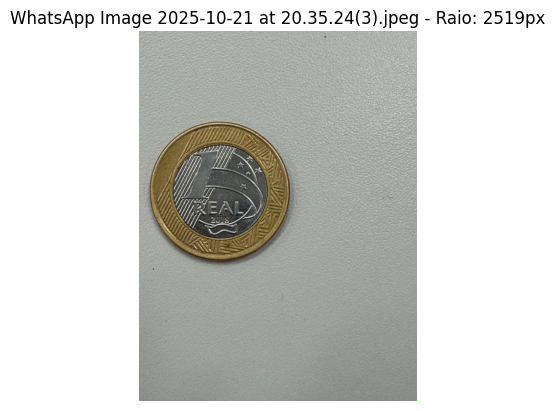

WhatsApp Image 2025-10-21 at 20.35.21(1).jpeg: raio ≈ 2519 px


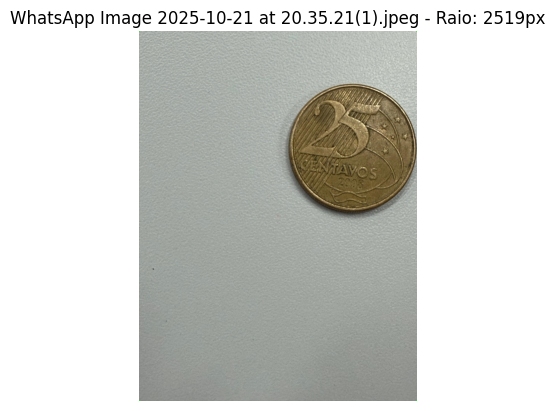

WhatsApp Image 2025-10-21 at 20.35.25(3).jpeg: raio ≈ 2519 px


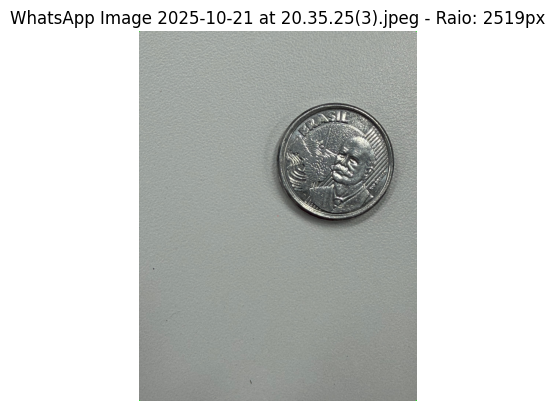

WhatsApp Image 2025-10-21 at 20.35.20.jpeg: raio ≈ 2519 px


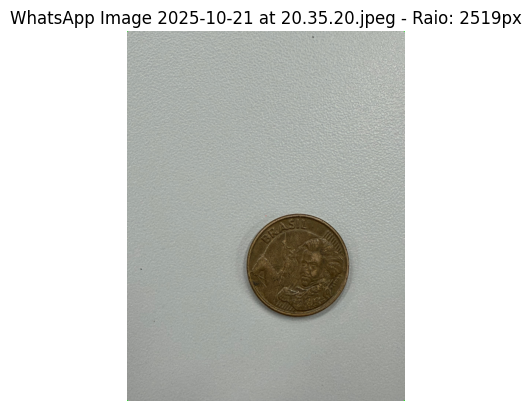

WhatsApp Image 2025-10-21 at 20.35.22.jpeg: raio ≈ 2518 px


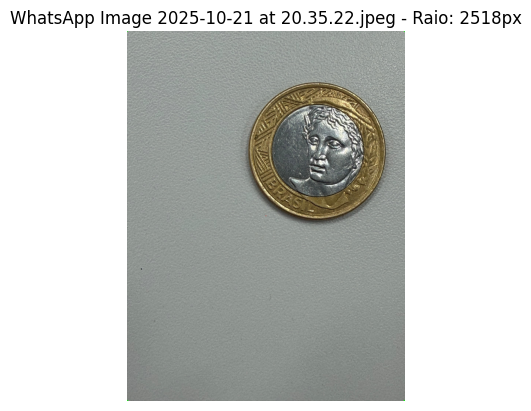

WhatsApp Image 2025-10-21 at 20.35.24(2).jpeg: raio ≈ 2518 px


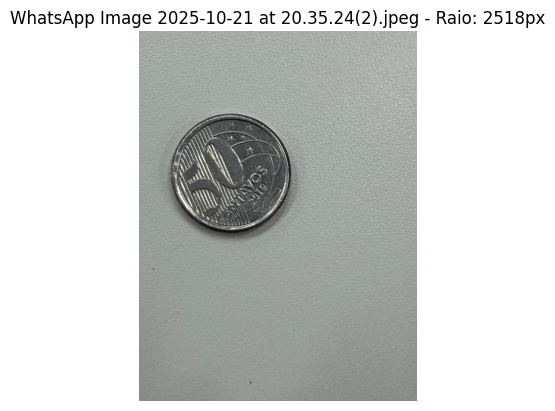

WhatsApp Image 2025-10-21 at 20.35.22(2).jpeg: raio ≈ 2519 px


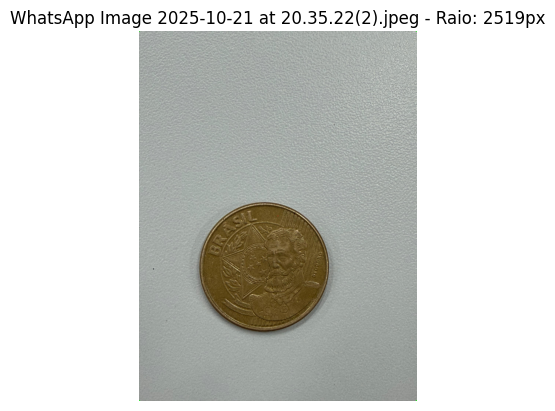

WhatsApp Image 2025-10-21 at 20.35.25(2).jpeg: raio ≈ 2519 px


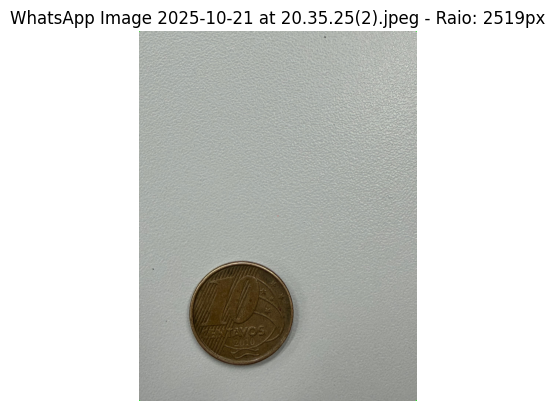

WhatsApp Image 2025-10-21 at 20.35.23(1).jpeg: raio ≈ 2519 px


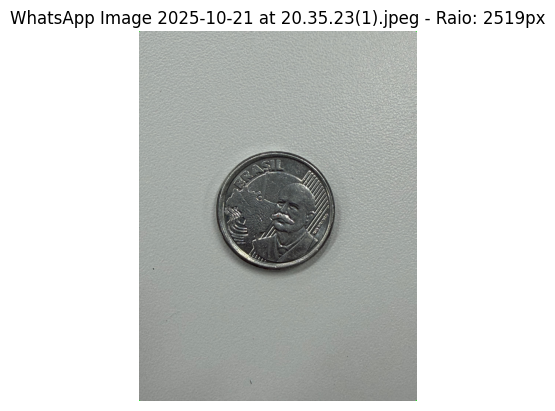

WhatsApp Image 2025-10-21 at 20.35.25(1).jpeg: raio ≈ 2519 px


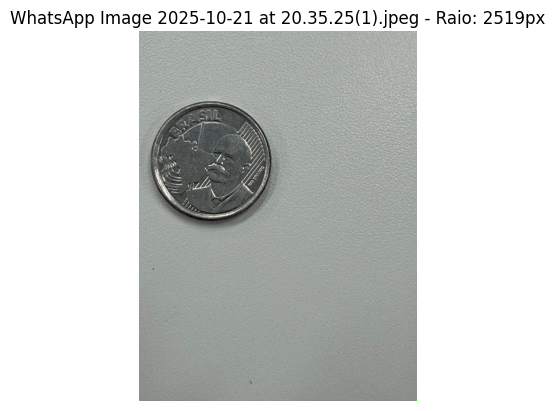

WhatsApp Image 2025-10-21 at 20.35.25.jpeg: raio ≈ 2519 px


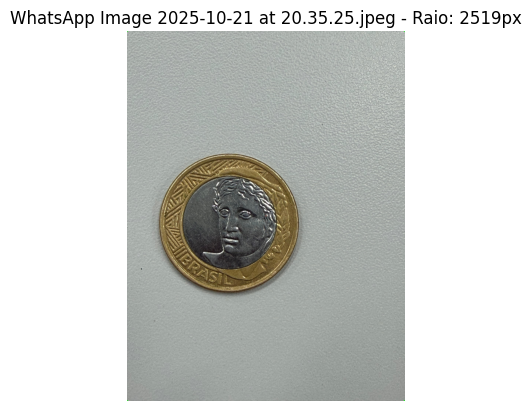

WhatsApp Image 2025-10-21 at 20.35.21.jpeg: raio ≈ 2518 px


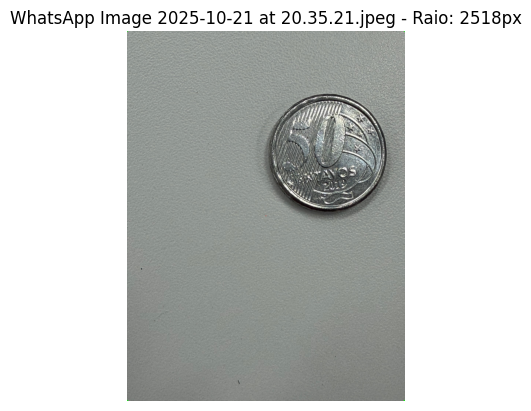

WhatsApp Image 2025-10-21 at 20.35.22(1).jpeg: raio ≈ 2519 px


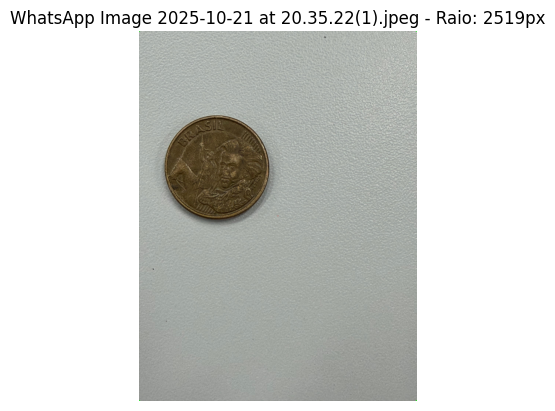

WhatsApp Image 2025-10-21 at 20.35.23(2).jpeg: raio ≈ 2519 px


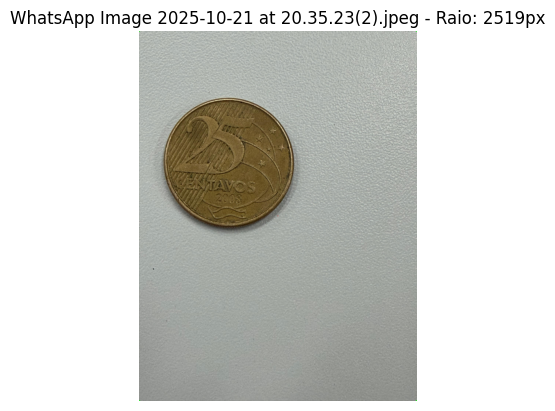

WhatsApp Image 2025-10-21 at 20.35.24(1).jpeg: raio ≈ 2519 px


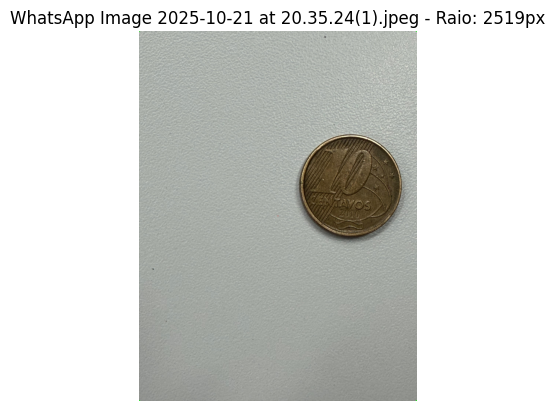

WhatsApp Image 2025-10-21 at 20.35.21(3).jpeg: raio ≈ 2519 px


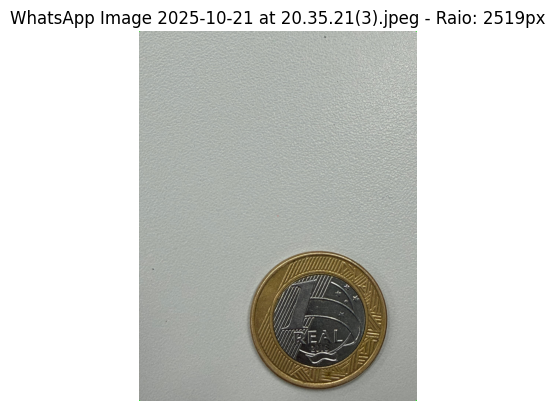

WhatsApp Image 2025-10-21 at 20.35.24.jpeg: raio ≈ 2519 px


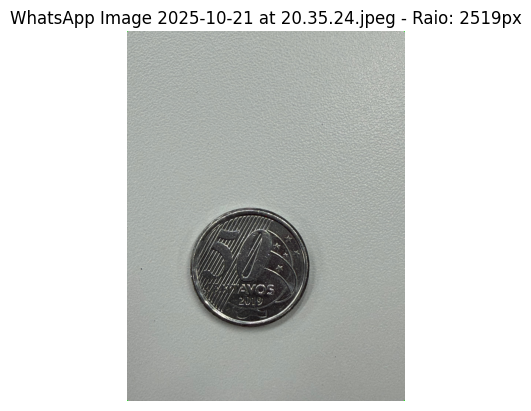

WhatsApp Image 2025-10-21 at 20.35.23.jpeg: raio ≈ 2519 px


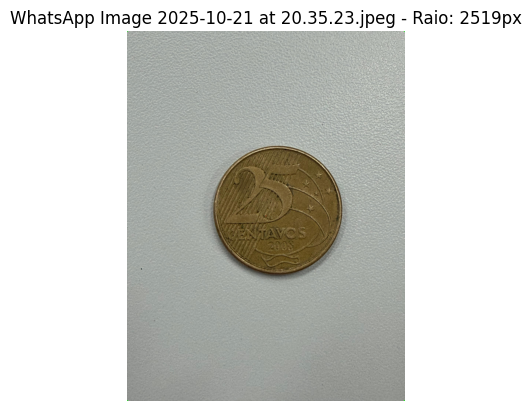

WhatsApp Image 2025-10-21 at 20.35.21(2).jpeg: raio ≈ 2519 px


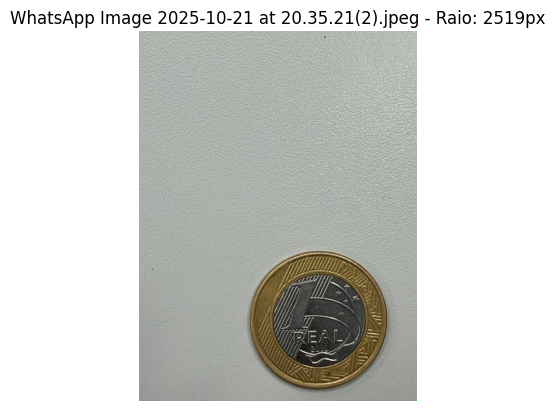

In [30]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagens = os.listdir('imagens')

for imagem in imagens:
    impath = os.path.join('imagens', imagem)
    moeda = cv2.imread(impath)
    moedaGray = cv2.cvtColor(moeda, cv2.COLOR_BGR2GRAY)

    # binarização
    _, binary_img = cv2.threshold(moedaGray, 120, 255, cv2.THRESH_BINARY)

    # encontrar contornos
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # ignorar se não encontrar contornos
    if not contours:
        continue

    # pega o maior contorno (provável moeda)
    c = max(contours, key=cv2.contourArea)

    # ajusta um círculo mínimo em volta do contorno
    (x, y), radius = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    radius = int(radius)

    # desenha círculo e centro na imagem original
    saida = moeda.copy()
    cv2.circle(saida, center, radius, (0, 255, 0), 10)
    cv2.circle(saida, center, 2, (0, 0, 255), 3)

    print(f"{imagem}: raio ≈ {radius} px")

    plt.imshow(cv2.cvtColor(saida, cv2.COLOR_BGR2RGB))
    plt.title(f"{imagem} - Raio: {radius}px")
    plt.axis('off')
    plt.show()
